## LASSO回归 Least Absolute Shrinkage and Selection Operator Regression
> **多加的一项，使用参数的绝对值代表参数的大小**

> **超参数alpha 表示正则化的程度**

<img src='./picture/9-1.png'>

## 不使用lasso回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(666)
x = np.random.uniform(-3, 3, size=100) # -3 到 3之间随机取值 
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)


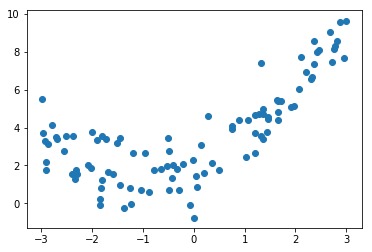

In [2]:
plt.scatter(x, y)
plt.show()

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures# 导入类，使用方法与之前归一化相同

def PolynomialRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('lin_reg', LinearRegression())
        ])

In [4]:
from sklearn.model_selection import train_test_split

np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [5]:
poly_reg = PolynomialRegression(degree=40)
poly_reg.fit(X_train, y_train)

y_poly_predict = poly_reg.predict(X_test)
mean_squared_error(y_test, y_poly_predict)

43.70424774773722

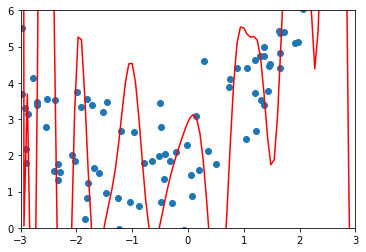

In [6]:
def plot_model(model):
    X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
    y_plot = model.predict(X_plot)

    plt.scatter(x, y)
    plt.plot(X_plot[:,0], y_plot, color='r')
    plt.axis([-3, 3, 0, 6])
    plt.show()
    
plot_model(poly_reg)

## 使用lasso回归

In [7]:
from sklearn.linear_model import Lasso

def LassoRegression(degree, alpha):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('lasso_reg', Lasso(alpha = alpha))
        ])

In [10]:
lasso1_reg = LassoRegression(40, 0.01)
lasso1_reg.fit(X_train, y_train)

y1_predict = lasso1_reg.predict(X_test)
mean_squared_error(y_test, y1_predict)

0.9039977846702115

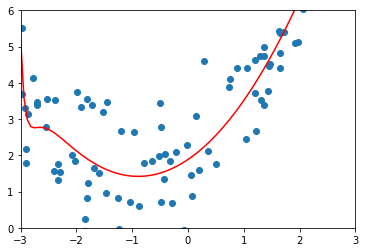

In [11]:
plot_model(lasso1_reg)

---
不同的超参数

In [13]:
lasso1_reg = LassoRegression(40, 0.001)
lasso1_reg.fit(X_train, y_train)

y1_predict = lasso1_reg.predict(X_test)
mean_squared_error(y_test, y1_predict)

D:\software\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.9428980734398018

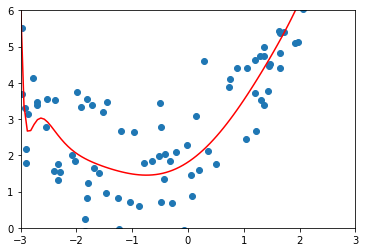

In [14]:
plot_model(lasso1_reg)

In [15]:
lasso1_reg = LassoRegression(40, 1)
lasso1_reg.fit(X_train, y_train)

y1_predict = lasso1_reg.predict(X_test)
mean_squared_error(y_test, y1_predict)

2.1607691119248105

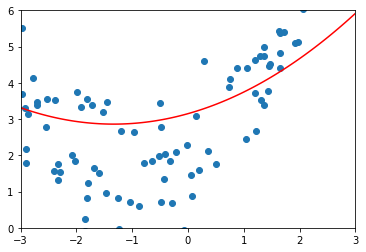

In [16]:
plot_model(lasso1_reg)

## 比较ridge 和 lasso
> **lasso方法可以使一部分参数变为0，表明可以舍弃原有一部分特征**

<img src='./picture/9-2.png'>

<img src='./picture/9-3.png'>
<img src='./picture/9-4.png'>
<img src='./picture/9-5.png'>